[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation 

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
# !nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

# conda install -c conda-forge --update-deps --force-reinstall ipykernel -y


In [2]:
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
# !sudo apt install python3.8

# !sudo apt-get install python3.8-distutils

# !python --version

# !apt-get update

# !apt install software-properties-common

# !sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

# !apt-get install python3-pip

# print('Git clone project and install requirements...')
# !git clone https://github.com/Winfredy/SadTalker &> /dev/null
# %cd SadTalker
# !export PYTHONPATH=/content/SadTalker:$PYTHONPATH
# !python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
# !apt update
# !apt install ffmpeg &> /dev/null
# !python3.8 -m pip install -r requirements.txt

Download models (1 mins)

In [3]:
# print('Download pre-trained models...')
# !rm -rf checkpoints
# !bash scripts/download_models.sh 

['ramveer.jpeg']


Dropdown(options=('ramveer',), value='ramveer')

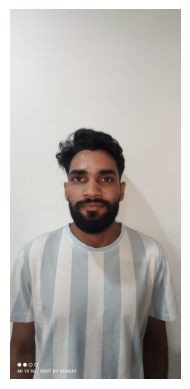

In [5]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
# print("Choose the image name to animate: (saved in folder 'examples/')") 
img_list = glob.glob1('examples/source_image', '*.jpeg') 
print(img_list)
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='ramveer')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.jpeg'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change) 
display(default_head_name) 
plt.imshow(plt.imread('examples/source_image/{}.jpeg'.format(default_head_name.value)))
plt.axis('off')
plt.show() 

Animation

In [8]:
# selected audio from exmaple/driven_audio 
import numpy as np 

np.long = np.longlong

img = 'examples/source_image/{}.jpeg'.format(default_head_name.value) 

print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan 

examples/source_image/ramveer.jpeg
using safetensor as default
3DMM Extraction for source image
Face Renderer:: 100%|█████████████████████████| 100/100 [10:59<00:00,  6.60s/it]
The generated video is named ./results/2024_05_15_11.02.44/ramveer##RD_Radio31_000.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100%|█████████████████████████| 200/200 [00:12<00:00, 16.27it/s]
The generated video is named ./results/2024_05_15_11.02.44/ramveer##RD_Radio31_000_full.mp4
face enhancer....
Face Enhancer:: 100%|█████████████████████████| 200/200 [20:21<00:00,  6.11s/it]
The generated video is named ./results/2024_05_15_11.02.44/ramveer##RD_Radio31_000_enhanced.mp4
The generated video is named: ./results/2024_05_15_11.02.44.mp4


In [14]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


FileNotFoundError: [Errno 2] No such file or directory: './results/'